In [1]:
# Libraries

import pandas as pd
import seaborn as sns

In [19]:
data = pd.read_pickle("./results_winter_summer_97.pkl")

print("Number of rows: " + str(len(data)))

# Preview
#data[140:181]
data[20:40]
#data[100:140]

Number of rows: 181


,aggregated_savings,daily_original_cost
20,2.393441,38.692880
21,2.393441,38.061974
22,2.393441,38.542624
23,2.393441,38.515733
24,2.393441,38.917344
25,2.393441,38.562457
26,2.393441,39.222541
27,2.393441,38.746941
28,2.393441,38.338055
29,2.393441,38.872037


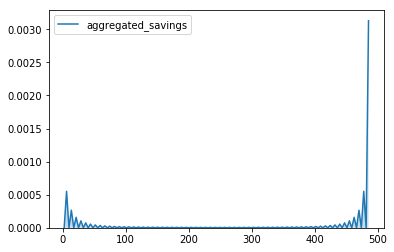

In [3]:
# Analysis winter vs summer

df_winter = data[0:140]
df_summer = data[140:181]

#sns.distplot(df_winter["aggregated_savings"])
sns.kdeplot(df_winter["aggregated_savings"],shade=True)
#sns.kdeplot(df_summer["aggregated_savings"], shade=True)



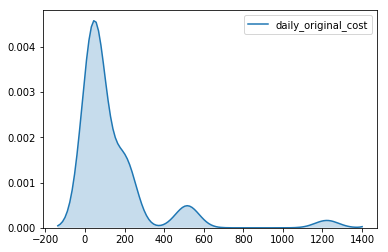

In [4]:
#sns.kdeplot(df_winter["daily_original_cost"], shade=True)
sns.kdeplot(df_summer["daily_original_cost"], shade=True)


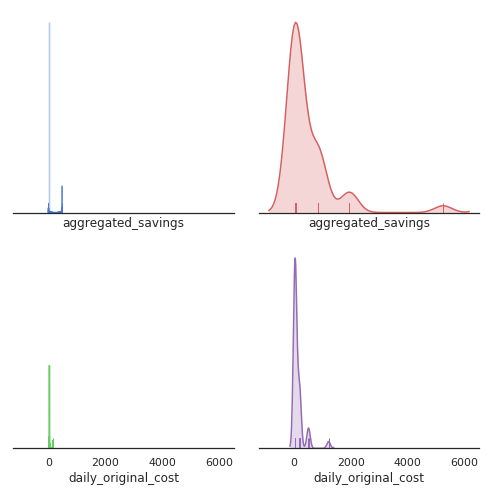

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_winter["aggregated_savings"], hist=True, rug=True, color="b", kde_kws={"shade": True}, ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(df_summer["aggregated_savings"], hist=False, rug=True, color="r", kde_kws={"shade": True}, ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(df_winter["daily_original_cost"], hist=True, rug=True, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(df_summer["daily_original_cost"], hist=False, rug=True, color="m", kde_kws={"shade": True}, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

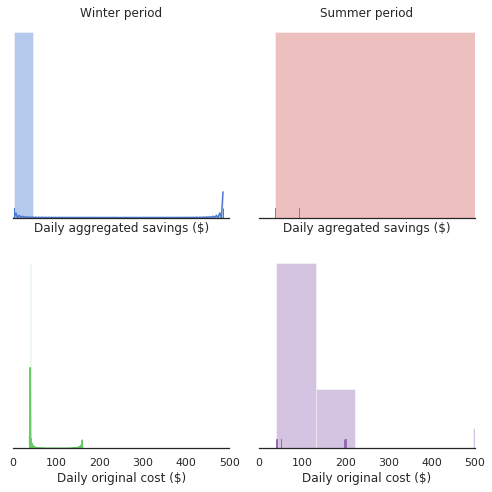

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
#axes[0,0].set_xlim(0,100)
sns.distplot(df_winter["aggregated_savings"], kde=True, rug=True, color="b", kde_kws={"shade": True}, ax=axes[0, 0]).set_title("Winter period")
axes[0,0].set(xlabel='Daily aggregated savings ($)' )
axes[0,0].set(xlim=(0,105))

#axes[0,0].set_ylabel("hola")

# Plot a kernel density estimate and rug plot
#axes[0,1].set_xlim(0,500)
sns.distplot(df_summer["aggregated_savings"], kde=False, rug=True, color="r", kde_kws={"shade": True}, ax=axes[0, 1]).set_title("Summer period")
axes[0,1].set(xlabel='Daily agregated savings ($)')
axes[0,1].set(xlim=(0,500))

# Plot a filled kernel density estimate
sns.distplot(df_winter["daily_original_cost"], kde=True, rug=True, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
axes[1,0].set(xlabel='Daily original cost ($)')

# Plot a histogram and kernel density estimate
sns.distplot(df_summer["daily_original_cost"], kde=False, rug=True, color="m", kde_kws={"shade": True}, ax=axes[1, 1])
axes[1,1].set(xlabel='Daily original cost ($)')

plt.setp(axes, yticks=[])
plt.tight_layout()

In [7]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df_winter["aggregated_savings"])

mu

5.843456589450732

In [8]:
df_winter["aggregated_savings"].mean()

5.843456589450727

In [9]:
df_winter["daily_original_cost"].mean()

39.86230810616857

In [10]:
df_winter["aggregated_savings"].mean()/df_winter["daily_original_cost"].mean()

0.1465910246312724

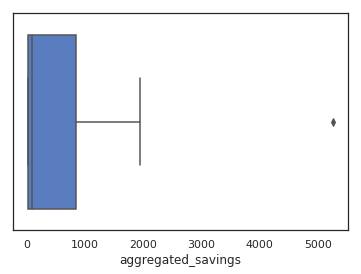

In [11]:
sns.boxplot(x=df_summer["aggregated_savings"])

[Text(0.5, 0, 'Daily agregated savings ($)')]

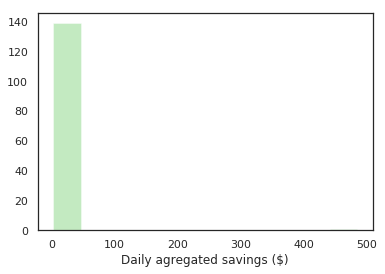

In [12]:
# Plot a kernel density estimate and rug plot
#sns.distplot(df_summer["aggregated_savings"], kde=False, rug=False, color="r", kde_kws={"shade": True})
ax = sns.distplot(df_winter["aggregated_savings"], kde=False, rug=False, color="g",  kde_kws={"shade": True})
ax.set(xlabel='Daily agregated savings ($)')

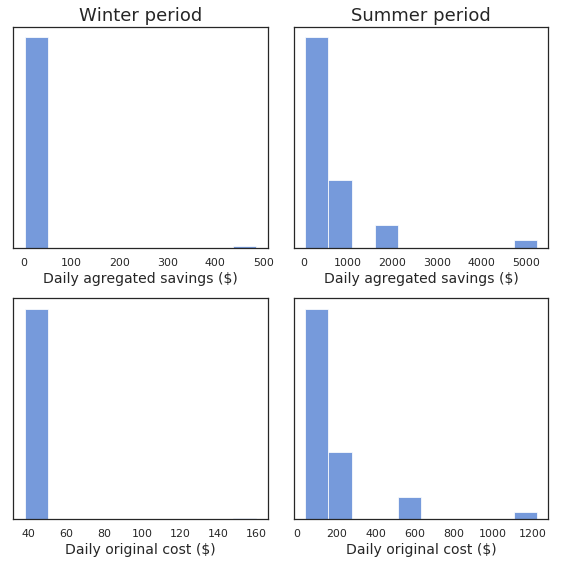

In [13]:
data=[df_winter["aggregated_savings"], df_summer["aggregated_savings"], df_winter["daily_original_cost"], df_summer["daily_original_cost"]]
xaxes = ['Daily agregated savings ($)','Daily agregated savings ($)','Daily original cost ($)','Daily original cost ($)']
yaxes = ['','','','']
titles = ['Winter period','Summer period','',''] 


f,a = plt.subplots(2,2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx], alpha=0.75, rwidth=1.8)
    ax.set_title(titles[idx],fontsize=18)
    ax.set_xlabel(xaxes[idx],fontsize=14)
    ax.set_ylabel(yaxes[idx])
    ax.get_yaxis().set_visible(False)
plt.tight_layout()

In [14]:
df_winter.sum()

aggregated_savings      818.083923
daily_original_cost    5580.723135
dtype: float64

In [15]:
df_summer.sum()

aggregated_savings     20528.438279
daily_original_cost     5865.355825
dtype: float64

In [16]:
df_summer['ratio']=df_summer['aggregated_savings']/df_summer['daily_original_cost']
max(df_summer['ratio'])

4.31823407484603

[Text(0, 0.5, 'Probability Density'), Text(0.5, 0, 'Daily savings (%)')]

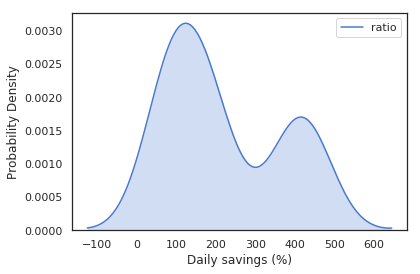

In [17]:
sns.kdeplot(100*df_summer["ratio"], shade=True).set(xlabel='Daily savings (%)',ylabel='Probability Density')

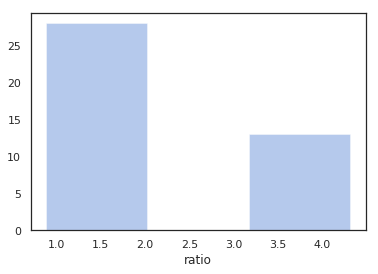

In [18]:
sns.distplot(df_summer["ratio"], kde=False)